
### Dataset complete info: 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

#### Attribute information

1. buying  $\quad$     v-high, high, med, low
2. maint    $\quad$    v-high, high, med, low
3. doors      $\quad$  2, 3, 4, 5-more
4. persons    $\quad$  2, 4, more
5. lug_boot    $\quad$ small, med, big
6. safety      $\quad$ low, med, high


### Procedure
1. getting the data
2. Cleaning the data
3. Visualizing the data
4. Spliting the data
5. Preprocessing 
6. fit the model


### Getting the data


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [180]:
data='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df=pd.read_csv(data, header=None, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Visualizing data

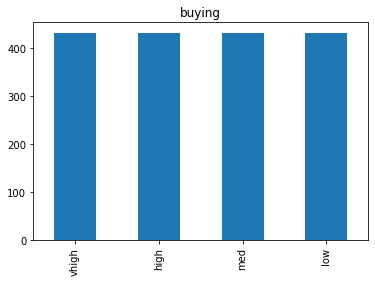

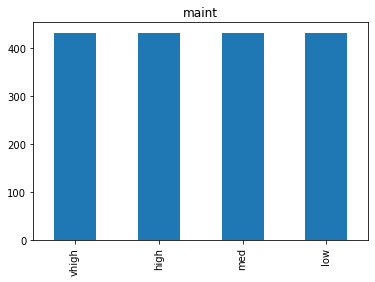

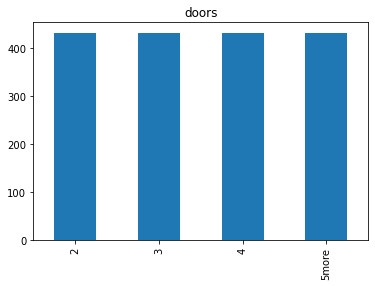

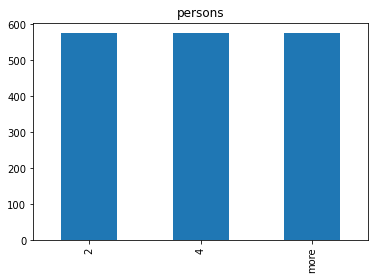

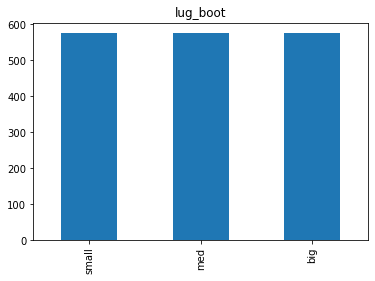

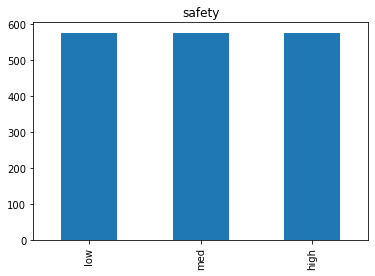

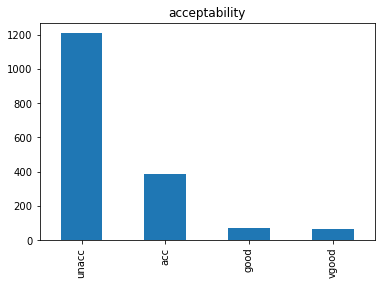

In [182]:
for col in df.columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


### Encoding the dataset into numeric values

In [183]:

from sklearn.preprocessing import OrdinalEncoder

In [184]:
buying  = df['buying'].unique()[::-1]
print(buying)


['low' 'med' 'high' 'vhigh']


In [185]:
maint = df['maint'].unique()[::-1]
print(maint)

['low' 'med' 'high' 'vhigh']


In [186]:
doors = df['doors'].unique()
print(doors)

['2' '3' '4' '5more']


In [187]:
persons = df['persons'].unique()
print(persons)

['2' '4' 'more']


In [188]:
lug_b = df['lug_boot'].unique()
print(lug_b)

['small' 'med' 'big']


In [189]:
safety = df['safety'].unique()
print(safety)

['low' 'med' 'high']


In [190]:
accept = df['acceptability'].unique()
print(accept)

['unacc' 'acc' 'vgood' 'good']


In [191]:
oe = OrdinalEncoder(categories=[buying, maint, doors, persons, lug_b, safety,accept])



In [192]:
oe.fit(df)

OrdinalEncoder(categories=[array(['low', 'med', 'high', 'vhigh'], dtype=object),
                           array(['low', 'med', 'high', 'vhigh'], dtype=object),
                           array(['2', '3', '4', '5more'], dtype=object),
                           array(['2', '4', 'more'], dtype=object),
                           array(['small', 'med', 'big'], dtype=object),
                           array(['low', 'med', 'high'], dtype=object),
                           array(['unacc', 'acc', 'vgood', 'good'], dtype=object)])

In [193]:
new_df = oe.transform(df)
new_df

array([[3., 3., 0., ..., 0., 0., 0.],
       [3., 3., 0., ..., 0., 1., 0.],
       [3., 3., 0., ..., 0., 2., 0.],
       ...,
       [0., 0., 3., ..., 2., 0., 0.],
       [0., 0., 3., ..., 2., 1., 3.],
       [0., 0., 3., ..., 2., 2., 2.]])

In [194]:
X,y=new_df[:,:-1], new_df[:,-1]

### Splitting the data and classiifying

In [195]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=0)

In [196]:
Rf_clf = RandomForestClassifier(random_state=0)
Rf_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [197]:
predictions = Rf_clf.predict(X_test)

C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


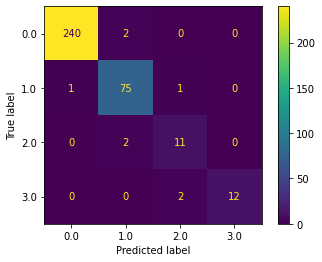

In [198]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(Rf_clf,X_test,Y_test)

In [199]:
c_matrix=confusion_matrix(Y_test, predictions)
c_matrix

array([[240,   2,   0,   0],
       [  1,  75,   1,   0],
       [  0,   2,  11,   0],
       [  0,   0,   2,  12]], dtype=int64)

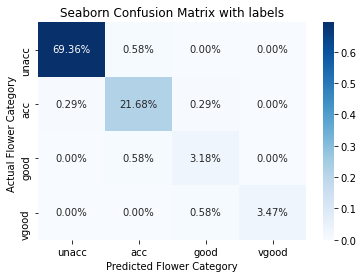

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['unacc','acc', 'good', 'vgood'])
ax.yaxis.set_ticklabels(['unacc','acc', 'good', 'vgood'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [201]:
(predictions == Y_test).sum()/len(Y_test)

0.976878612716763

In [202]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, predictions)
print(acc)

0.976878612716763


In [203]:
rfc=RandomForestClassifier()

In [204]:
param_grid = { 
    'n_estimators': [200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [205]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 800, 1000]})

In [206]:
df_Gr = pd.DataFrame(CV_rfc.cv_results_)
dfn = pd.DataFrame(df_Gr[['param_criterion','param_max_depth','param_max_features','param_n_estimators','mean_test_score']])

In [207]:
res_df=dfn.sort_values(by='mean_test_score',ascending=False)
res_df.head(10)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score
114,entropy,8,sqrt,800,0.961652
112,entropy,8,sqrt,200,0.959483
119,entropy,8,log2,1000,0.959478
111,entropy,8,auto,1000,0.959478
55,gini,8,sqrt,1000,0.959475
56,gini,8,log2,200,0.959475
58,gini,8,log2,800,0.959473
109,entropy,8,auto,500,0.958034
116,entropy,8,log2,200,0.958034
117,entropy,8,log2,500,0.958034


In [208]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800}